In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

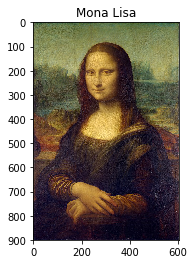

In [2]:
img = plt.imread('MonaLisa.jpg')
plt.imshow(img);
plt.title("Mona Lisa");

In [3]:
height, width = img.shape[0], img.shape[1]
img_rgb = img.reshape(-1, 3)

y_5000 = np.random.choice(height, size=5000, replace=True)
x_5000 = np.random.choice(width, size=5000, replace=True)

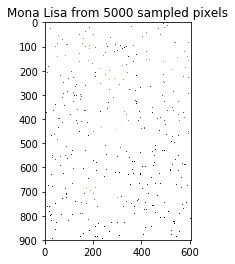

In [4]:
img_5000px = np.zeros([height, width, 3]) + 255
pixels = []
for x, y in zip(x_5000, y_5000):
    pixels.append(img[y,x])
    img_5000px[y,x] = img[y,x]

# Plotting the result
# Division by 255 because of rescaling the pixel intensities to lie between 0.0 and 1.0
plt.imshow(img_5000px / 255);
plt.title("Mona Lisa from 5000 sampled pixels");

In [5]:
coords = np.array([y_5000, x_5000]).T

In [6]:
def rand_forest_regr(n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    rf = RandomForestRegressor(n_estimators=n_estimators, 
                               max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)
    rf.fit(coords, pixels)
    
    prediction = np.zeros([height, width, 3])
    for i in range(height):
        for j in range(width):
            prediction[i,j] = rf.predict(np.array([i,j]).reshape(1,-1))
    return prediction / 255

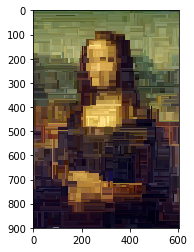

In [7]:
img_rf = rand_forest_regr(1)
plt.imshow(img_rf)
plt.show()

In [8]:
def display_results(pars):
    i = 1
    for n_estimators in pars['n_estimators']:
        for max_depth in pars['max_depth']:
            img_rf = rand_forest_regr(n_estimators, max_depth)
            plt.imshow(img_rf)
            title = "N_Trees=" + str(n_estimators) + " Depth=" + str(max_depth)
            plt.title(title);
            plt.show()
            i += 1

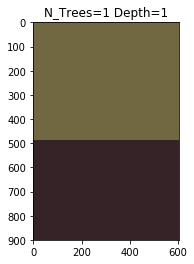

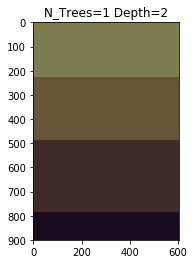

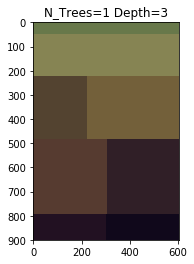

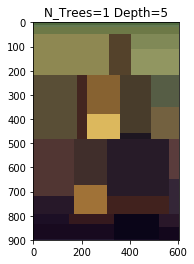

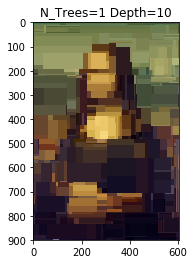

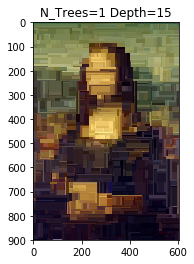

In [9]:
params = {'n_estimators' : [1],
          'max_depth' : [1, 2, 3, 5, 10, 15]}
display_results(params)

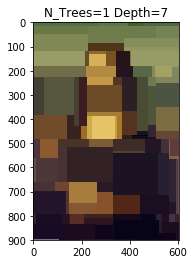

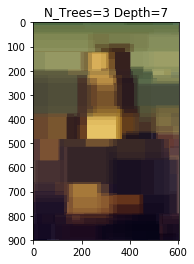

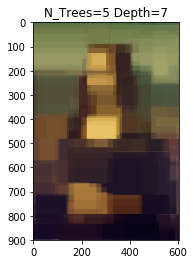

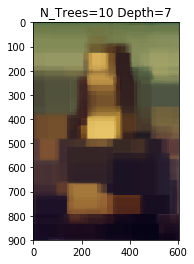

In [10]:
params = {'n_estimators' : [1, 3, 5, 10],
          'max_depth' : [7]}
display_results(params)

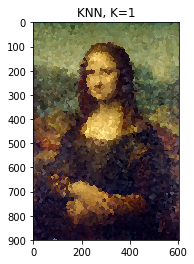

In [11]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(coords, pixels)

prediction = np.zeros([height, width, 3])
for i in range(height):
    for j in range(width):
        prediction[i,j] = knn.predict(np.array([i,j]).reshape(1,-1))

plt.imshow(prediction / 255)
plt.title('KNN, K=1');
plt.show()

# Pruning Analysis

In [12]:
def disp_pruning_results(pars):
    i = 1
    for min_samples_split in pars['min_samples_split']:
        for min_samples_leaf in pars['min_samples_leaf']:
            img_rf = rand_forest_regr(max_depth=10, 
                                      min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf)
            plt.imshow(img_rf)
            title = "min_samples_split=" + str(min_samples_split) + " min_samples_leaf=" + str(min_samples_leaf)
            plt.title(title);
            plt.show()
            i += 1

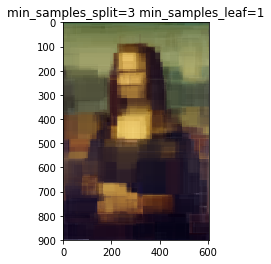

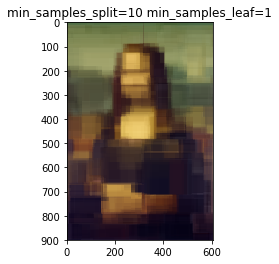

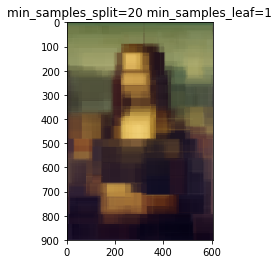

In [13]:
params = {'min_samples_split' : [3, 10, 20],
          'min_samples_leaf' : [1]}
disp_pruning_results(params)

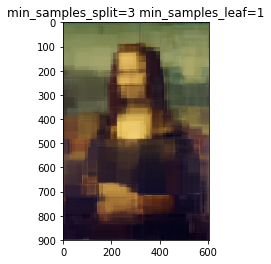

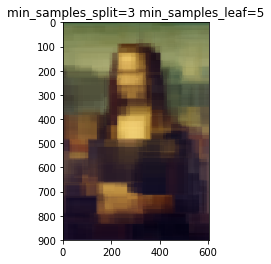

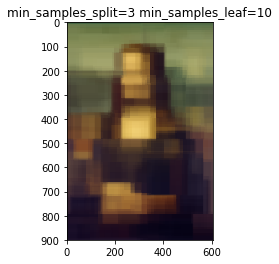

In [14]:
params = {'min_samples_split' : [3],
          'min_samples_leaf' : [1, 5, 10]}
disp_pruning_results(params)